# Visualizacion de los datos ya limpios

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.express as px
import statsmodels.api as sm
import plotly.graph_objects as go

#Cargamos los datos

In [2]:

df = pd.read_csv('https://raw.githubusercontent.com/Brandon9779/Analisi-de-DATOS-climatologicos/refs/heads/main/datos_climaticos_medellin_enriquecido_limpio%20(1).csv')
df.head()

,fecha,año,mes,ciudad,zona,precipitacion_mm,temp_max,temp_min,humedad,viento_10m,presion,temp_media,rango_termico,indice_calor_aprox,evento_lluvia,humedad_alta,estacion,condicion_climatica
0,1981-01-01,1981,enero,Medellín,urbana,2.07,20.61,12.99,90.66,0.81,81.56,16.800,7.62,42.1508,True,True,seca_corta,lluvioso
1,1981-01-02,1981,enero,Envigado,mixta,0.93,20.31,12.70,89.39,0.96,81.58,16.505,7.61,41.3317,True,True,seca_corta,lluvioso
2,1981-01-03,1981,enero,Envigado,mixta,4.53,22.58,12.12,87.52,1.02,81.49,17.350,10.46,41.5176,True,True,seca_corta,lluvioso
3,1981-01-04,1981,enero,Itagüí,urbana,1.72,22.73,12.54,83.95,0.80,81.50,17.635,10.19,40.7785,True,False,seca_corta,lluvioso
4,1981-01-05,1981,enero,Itagüí,urbana,4.52,21.95,13.34,87.02,0.56,81.53,17.645,8.61,41.9696,True,True,seca_corta,lluvioso


#Una pequeña mirada

In [3]:
df.shape

(16249, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16249 entries, 0 to 16248
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fecha                16249 non-null  object 
 1   año                  16249 non-null  int64  
 2   mes                  16249 non-null  object 
 3   ciudad               16249 non-null  object 
 4   zona                 16249 non-null  object 
 5   precipitacion_mm     16249 non-null  float64
 6   temp_max             16249 non-null  float64
 7   temp_min             16249 non-null  float64
 8   humedad              16249 non-null  float64
 9   viento_10m           16249 non-null  float64
 10  presion              16249 non-null  float64
 11  temp_media           16249 non-null  float64
 12  rango_termico        16249 non-null  float64
 13  indice_calor_aprox   16249 non-null  float64
 14  evento_lluvia        16249 non-null  bool   
 15  humedad_alta         16249 non-null 

In [5]:
df.describe()

,año,precipitacion_mm,temp_max,temp_min,humedad,viento_10m,presion,temp_media,rango_termico,indice_calor_aprox
count,16249.000000,16249.000000,16249.000000,16249.000000,16249.000000,16249.000000,16249.000000,16249.000000,16249.000000,16249.000000
mean,2002.747492,7.404536,21.490014,14.543942,88.717141,0.726594,81.588981,18.016978,6.946071,42.785019
std,12.844411,6.714063,1.671093,0.915674,4.146108,0.187837,0.095795,0.990733,1.826420,1.148343
min,1981.000000,0.000000,15.250000,10.600000,66.880000,0.220000,81.180000,13.355000,1.750000,35.067900
25%,1992.000000,2.260000,20.300000,13.990000,86.390000,0.590000,81.520000,17.355000,5.600000,42.162500
50%,2003.000000,5.860000,21.580000,14.600000,89.040000,0.710000,81.590000,18.015000,6.970000,42.926500
75%,2014.000000,10.740000,22.630000,15.150000,91.590000,0.840000,81.660000,18.640000,8.220000,43.572100
max,2025.000000,132.060000,29.120000,18.060000,98.390000,1.640000,81.930000,22.785000,14.140000,46.402600


In [6]:
df.columns

Index(['fecha', 'año', 'mes', 'ciudad', 'zona', 'precipitacion_mm', 'temp_max',
       'temp_min', 'humedad', 'viento_10m', 'presion', 'temp_media',
       'rango_termico', 'indice_calor_aprox', 'evento_lluvia', 'humedad_alta',
       'estacion', 'condicion_climatica'],
      dtype='object')

#Garantizar que los datos sean consistentes y analizables.

In [7]:
df.isnull().sum()

,0
fecha,0
año,0
mes,0
ciudad,0
zona,0
precipitacion_mm,0
temp_max,0
temp_min,0
humedad,0
viento_10m,0


#1. Análisis exploratorio
Explorar patrones, relaciones y distribuciones.

In [8]:
df.describe()
df['zona'].value_counts()

,count
zona,
urbana,6589
montañosa,3261
mixta,3239
suburbana,3160


# 1.1 HISTOGRAMAS

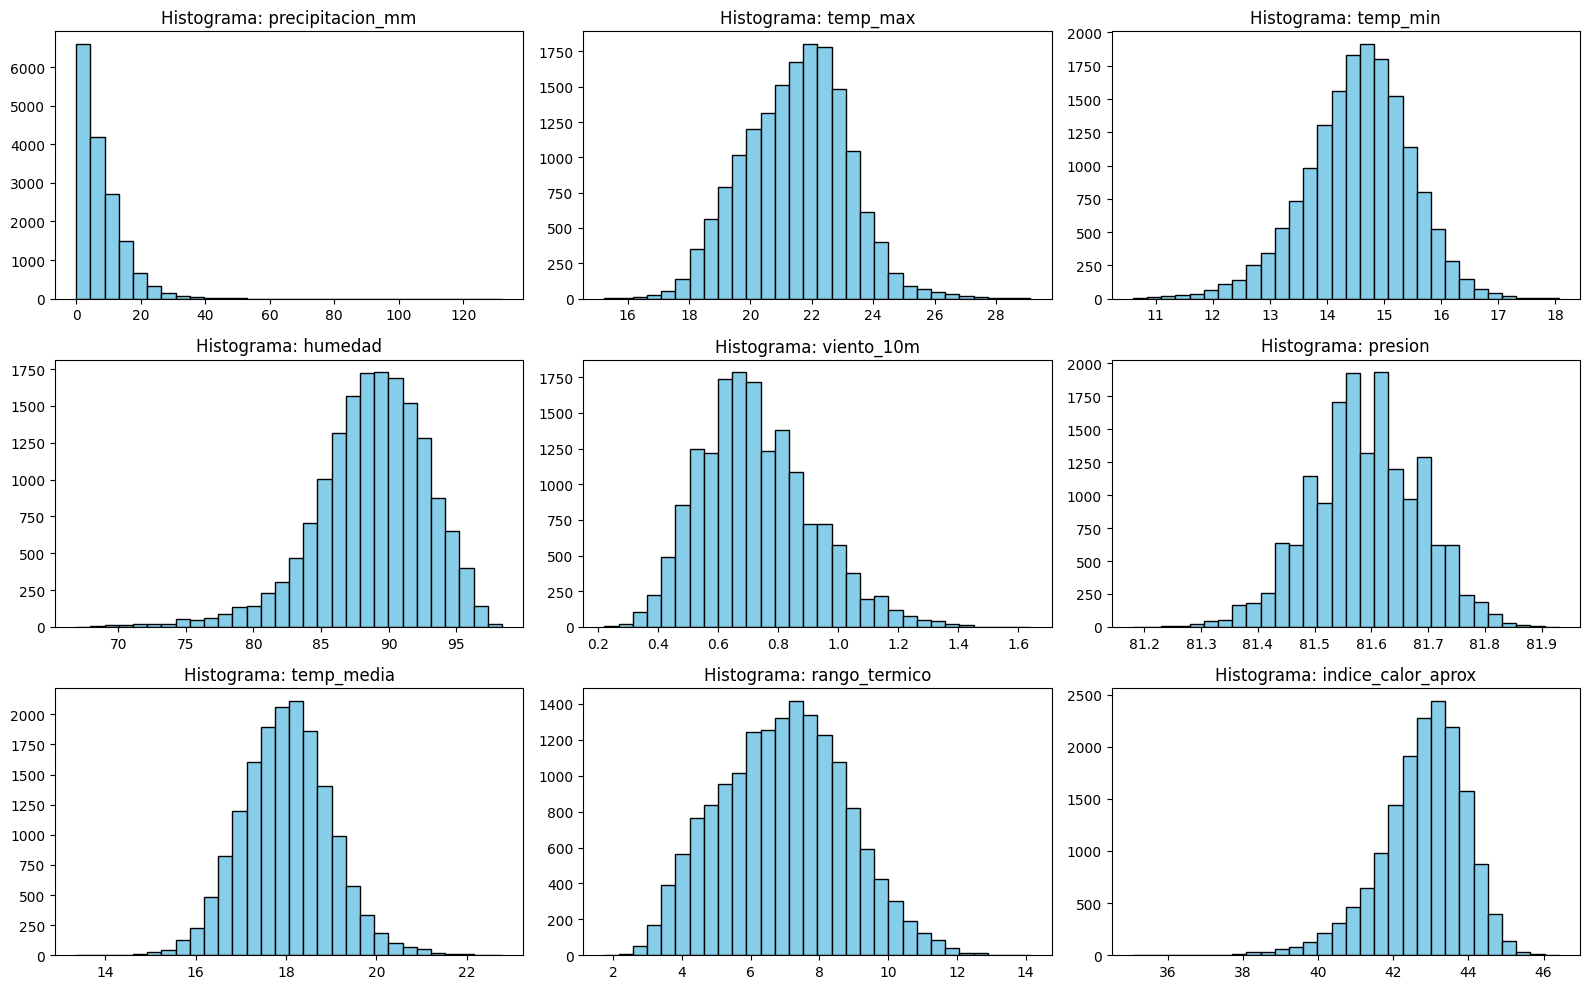

In [9]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols = [col for col in numeric_cols if col.lower() != 'año']

plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot((len(numeric_cols) + 2) // 3, 3, i + 1)
    plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma: {col}')
plt.tight_layout()
plt.show()

#1.2 BOXPLOTS

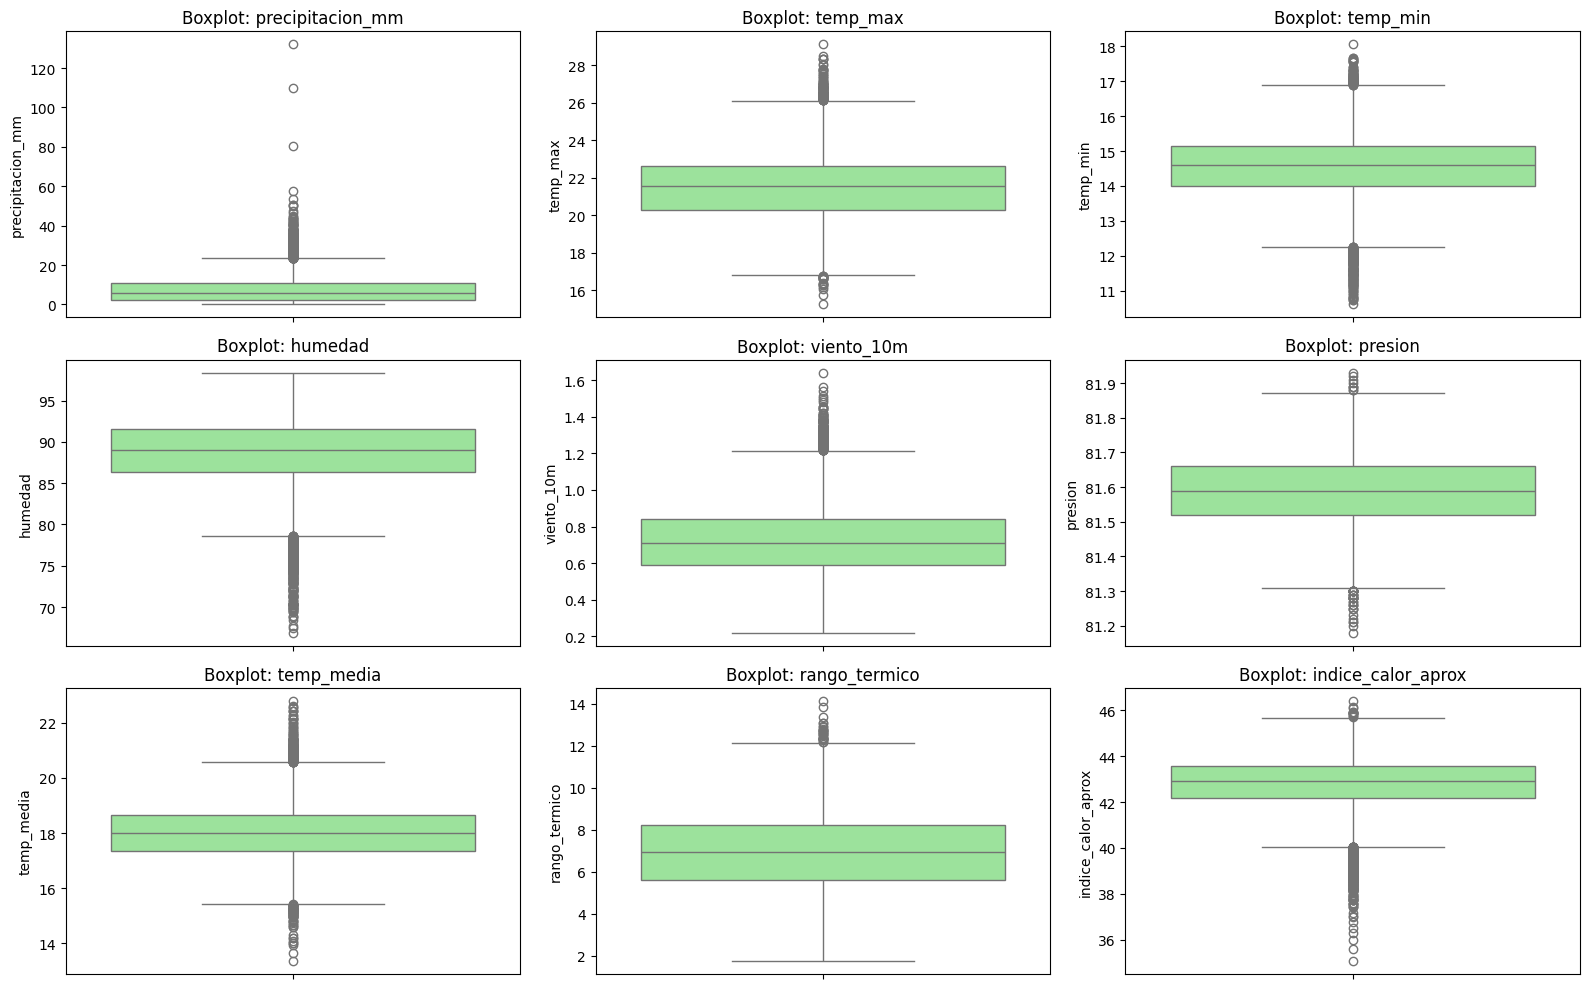

In [10]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot((len(numeric_cols) + 2) // 3, 3, i + 1)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()

#1.2.1 Generar boxplots para cada variable numérica por ciudad

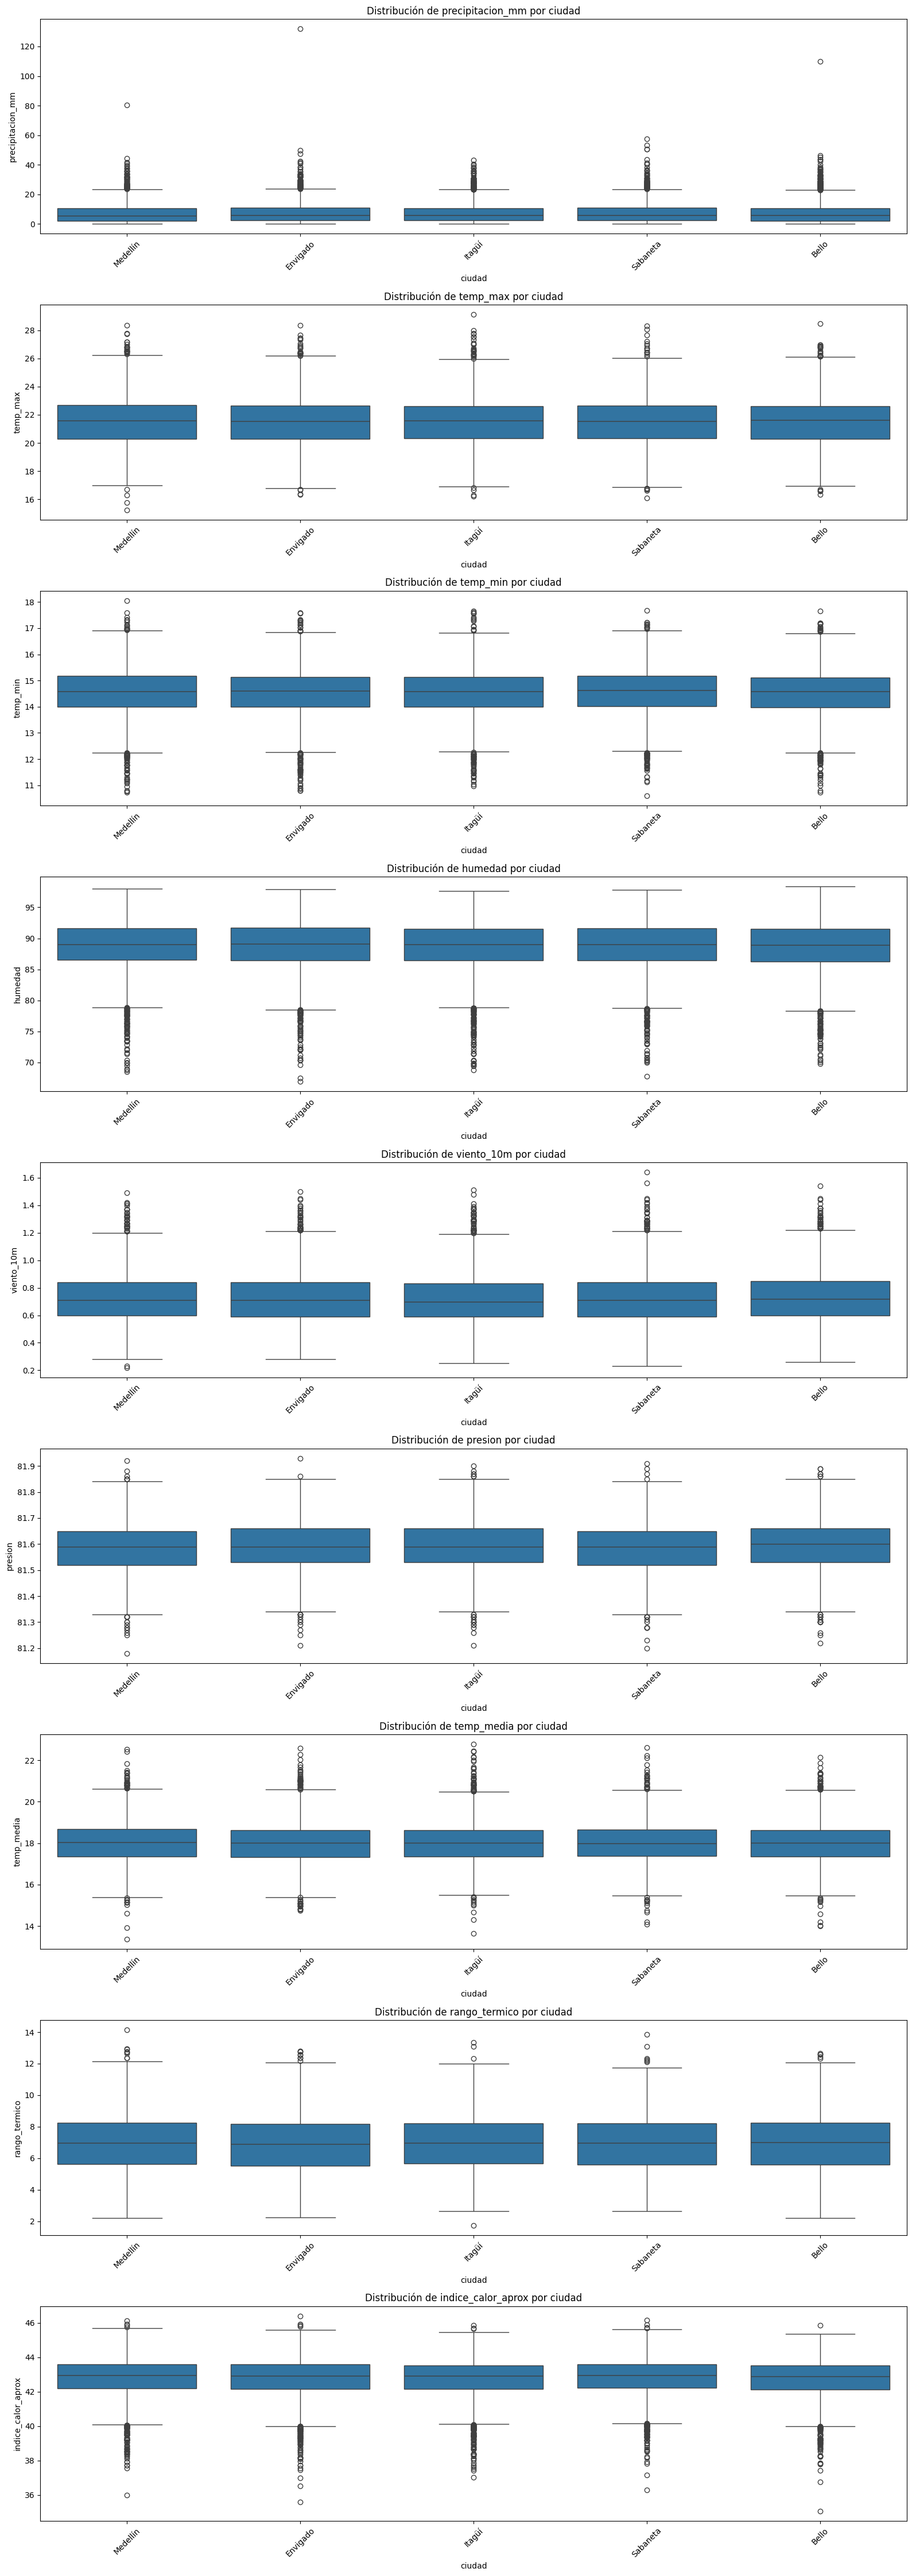

In [11]:
# Columna de ciudad
col_ciudad = 'ciudad'


plt.figure(figsize=(16, 5 * len(numeric_cols)))

for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 1, i + 1)
    sns.boxplot(x=col_ciudad, y=col, data=df)
    plt.title(f'Distribución de {col} por ciudad')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#1.2.2 Generar boxplots para cada variable numérica por ciudad

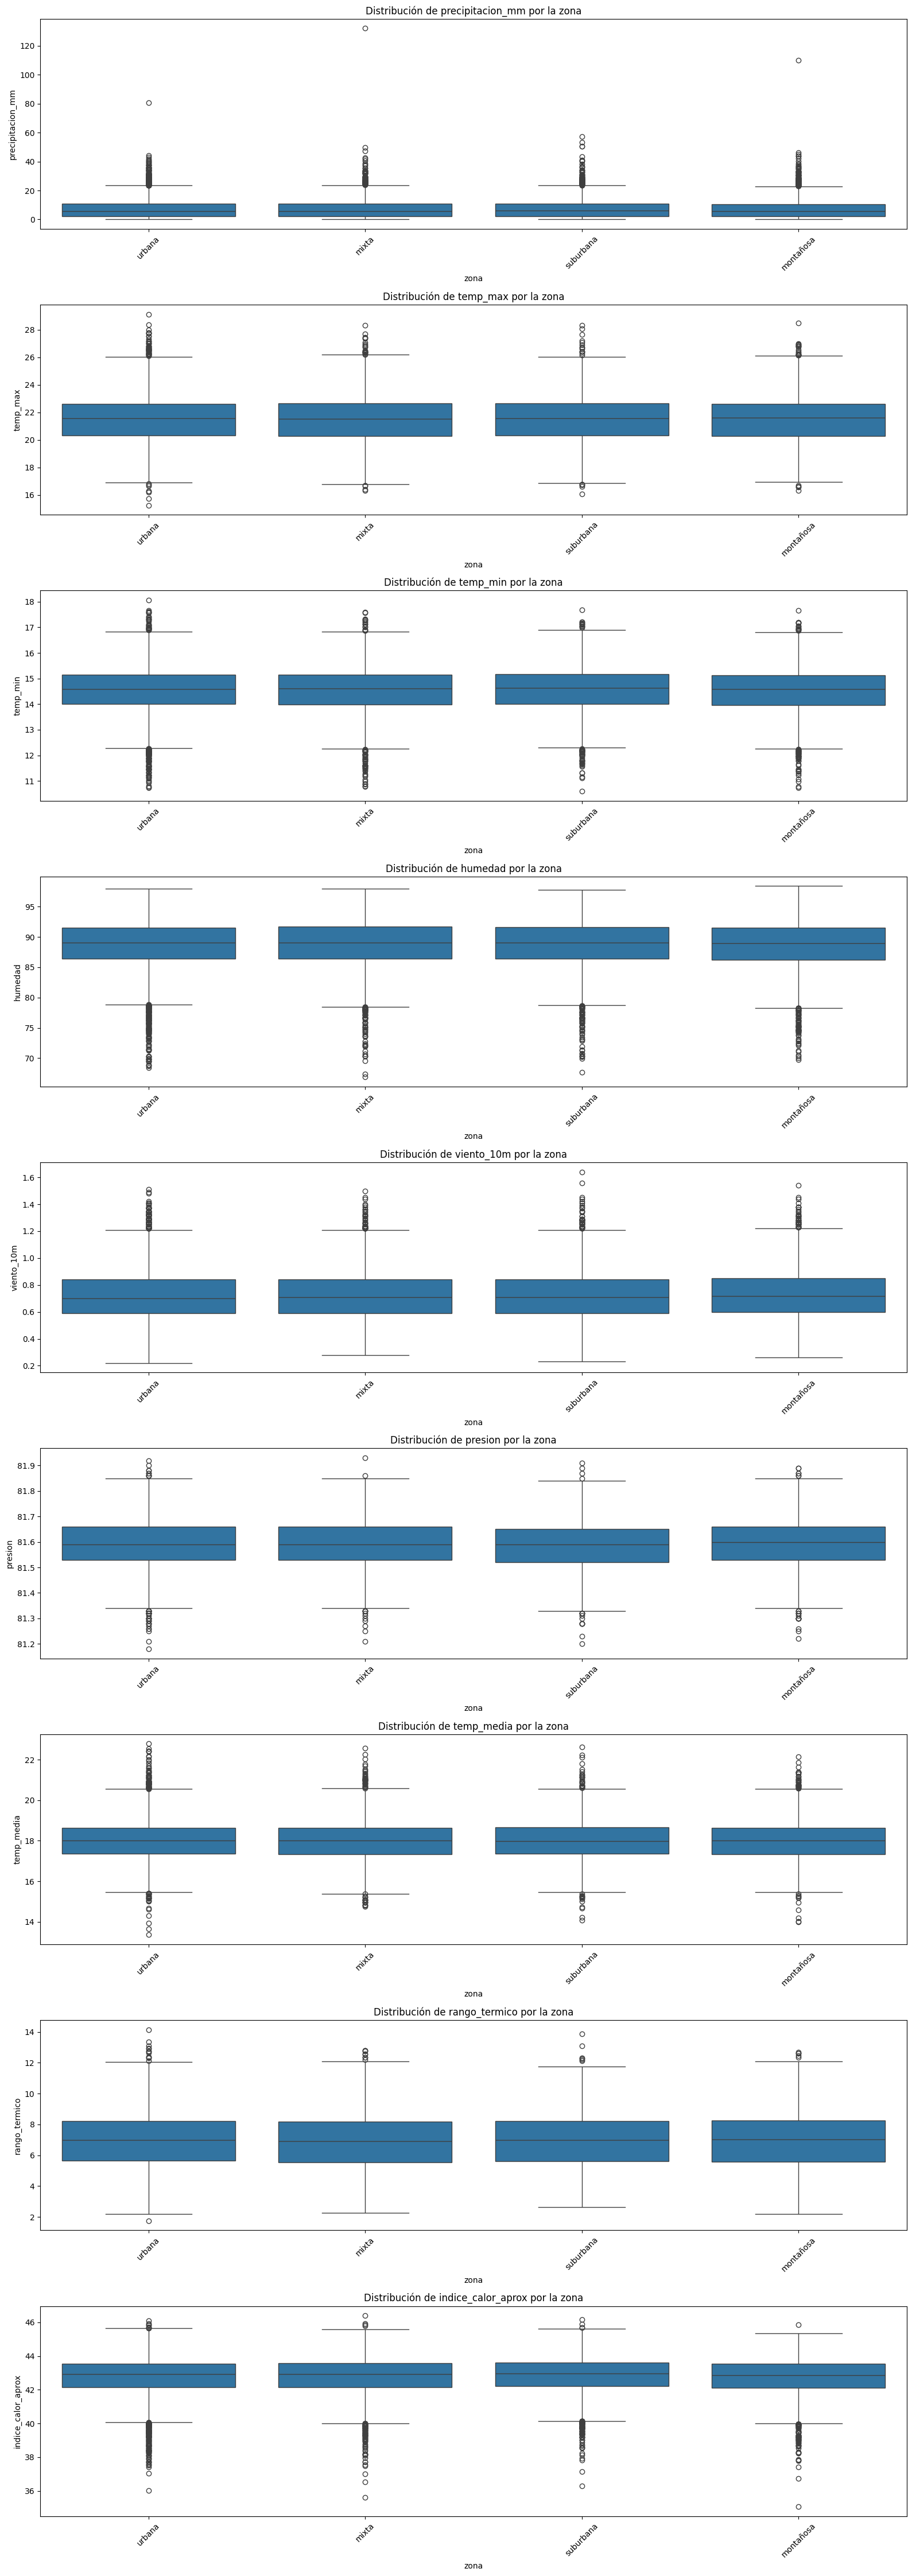

In [12]:
# Columna de ciudad
col_ciudad = 'zona'


plt.figure(figsize=(16, 5 * len(numeric_cols)))

for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 1, i + 1)
    sns.boxplot(x=col_ciudad, y=col, data=df)
    plt.title(f'Distribución de {col} por la zona')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#1.3 MATRIX DE CORRELACIONES

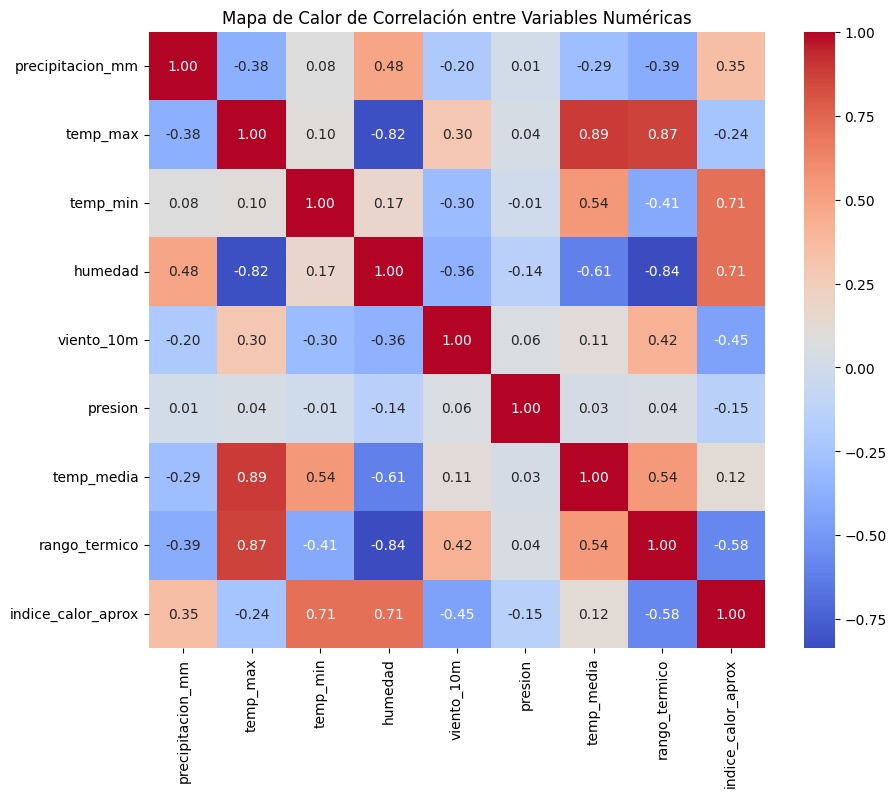

In [13]:
plt.figure(figsize=(10, 8))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
plt.show()

#1.4 Evolución en el tiempo

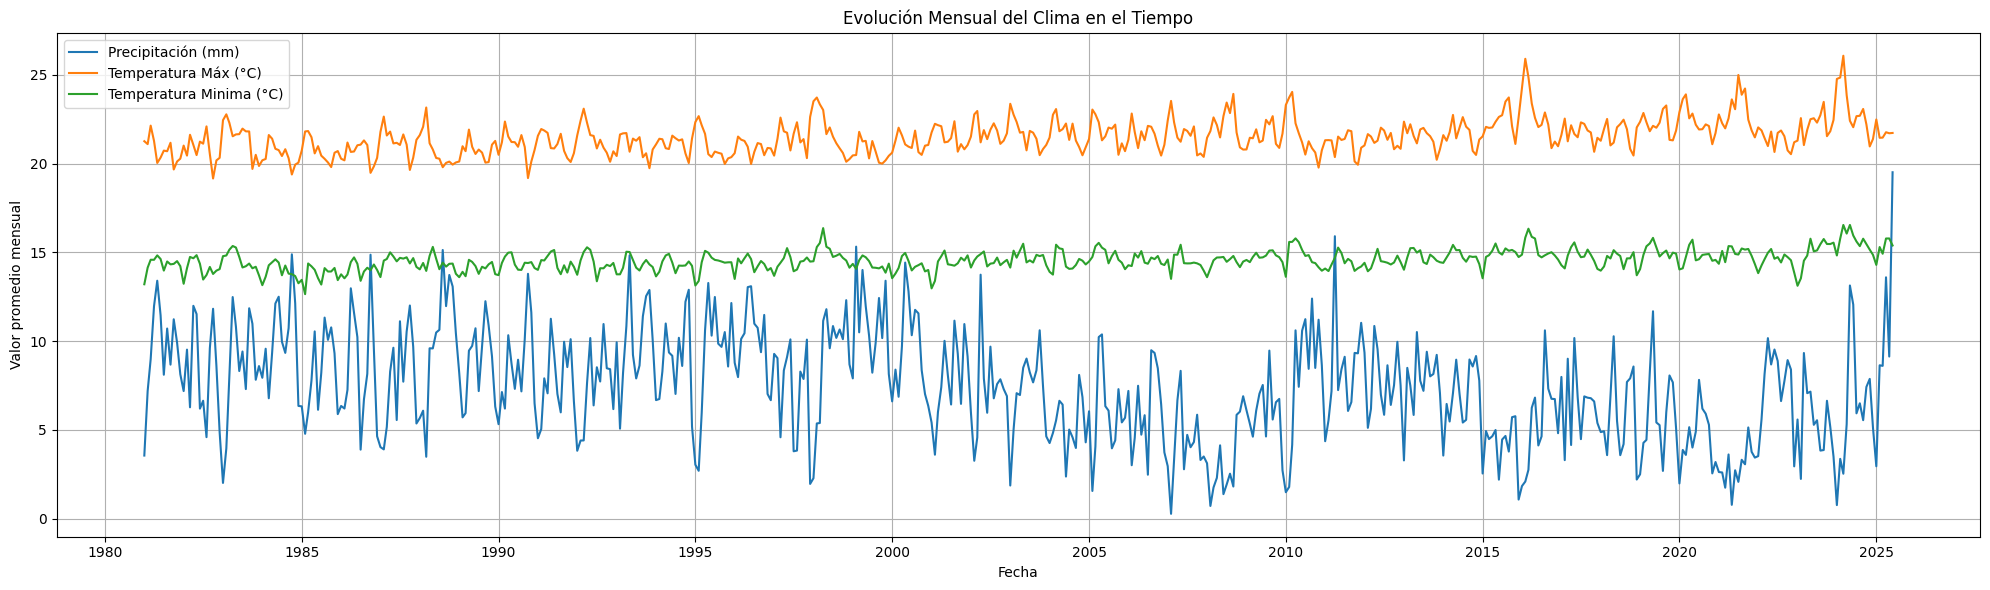

In [14]:
columnas_numericas = [
    'precipitacion_mm', 'temp_max', 'temp_min', 'humedad',
    'viento_10m', 'presion', 'temp_media', 'rango_termico',
    'indice_calor_aprox'
]
for col in columnas_numericas:
    df[col] = df[col].astype(str).str.replace(' ', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')
df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')
df['ano'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month

# Agrupación mensual
df_mensual = df.groupby(['ano', 'mes'])[['precipitacion_mm', 'temp_min', 'temp_max']].mean().reset_index()
df_mensual['fecha_mensual'] = pd.to_datetime(dict(year=df_mensual['ano'], month=df_mensual['mes'], day=1))

# Gráfico
plt.figure(figsize=(20, 6))
sns.lineplot(data=df_mensual, x='fecha_mensual', y='precipitacion_mm', label='Precipitación (mm)')
sns.lineplot(data=df_mensual, x='fecha_mensual', y='temp_max', label='Temperatura Máx (°C)')
sns.lineplot(data=df_mensual, x='fecha_mensual', y='temp_min', label='Temperatura Minima (°C)')
plt.title('Evolución Mensual del Clima en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor promedio mensual')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#1.5 Gráficos categóricos

In [15]:
# Agrupación por estación
estacion_grouped = df.groupby('estacion')[['precipitacion_mm', 'temp_max', 'temp_media']].mean().reset_index()

# Agrupación por condición climática
condicion_grouped = df.groupby('condicion_climatica')[['precipitacion_mm', 'temp_max', 'temp_media']].mean().reset_index()

#1.5.1 Promedio de precipitación por estación

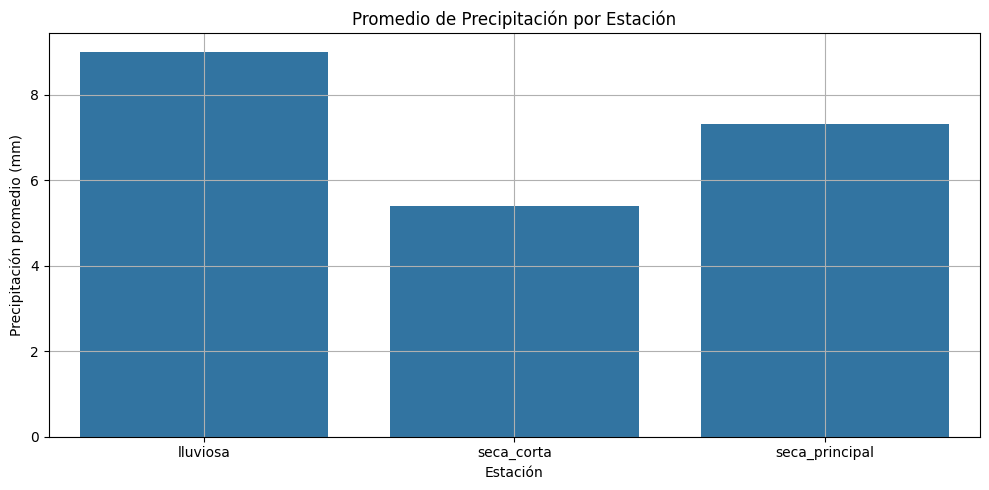

In [16]:
plt.figure(figsize=(10, 5))
sns.barplot(data=estacion_grouped, x='estacion', y='precipitacion_mm')
plt.title('Promedio de Precipitación por Estación')
plt.ylabel('Precipitación promedio (mm)')
plt.xlabel('Estación')
plt.grid(True)
plt.tight_layout()
plt.show()


#1.5.2 Temperatura media por condición climática

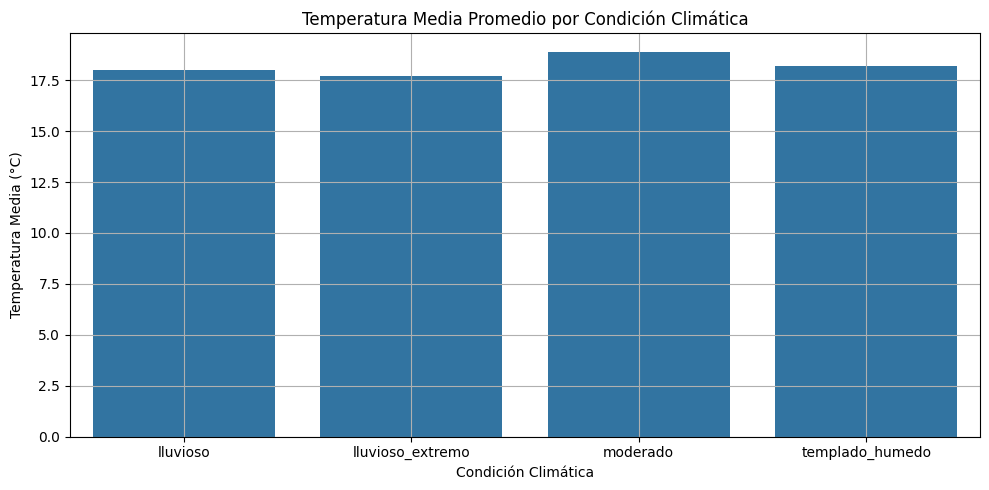

In [17]:
plt.figure(figsize=(10, 5))
sns.barplot(data=condicion_grouped, x='condicion_climatica', y='temp_media')
plt.title('Temperatura Media Promedio por Condición Climática')
plt.ylabel('Temperatura Media (°C)')
plt.xlabel('Condición Climática')
plt.grid(True)
plt.tight_layout()
plt.show()

#1.5.3 Conteo de eventos de lluvia

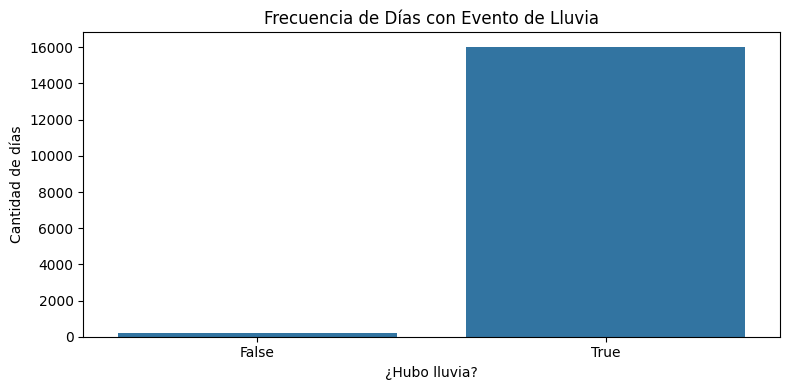

In [18]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='evento_lluvia')
plt.title('Frecuencia de Días con Evento de Lluvia')
plt.xlabel('¿Hubo lluvia?')
plt.ylabel('Cantidad de días')
plt.tight_layout()
plt.show()

#1.2 Analisis Comparativo

En el analisis exploratorio comparamos datos por medio de Generar boxplots, aca seremos un poco mas especificos con las comparaciones.

#2.1 ¿Llueve más en la zona urbana o en la rural/mixta?
# -------------------------------
#  Precipitación por zona
# -------------------------------

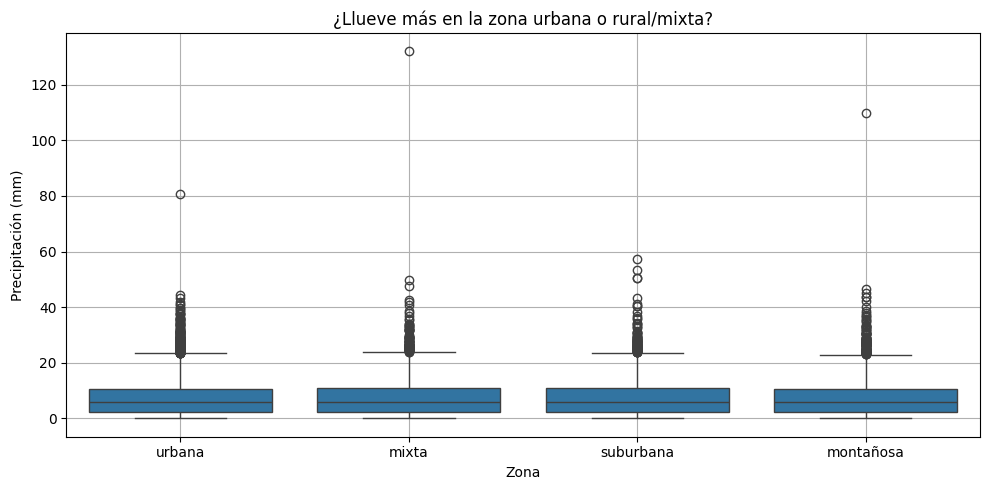

In [19]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='zona', y='precipitacion_mm')
plt.title('¿Llueve más en la zona urbana o rural/mixta?')
plt.ylabel('Precipitación (mm)')
plt.xlabel('Zona')
plt.grid(True)
plt.tight_layout()
plt.show()

#2.2 ¿Las temperaturas cambian según la estación?
# -------------------------------
# 2. Temperaturas por estación
# -------------------------------

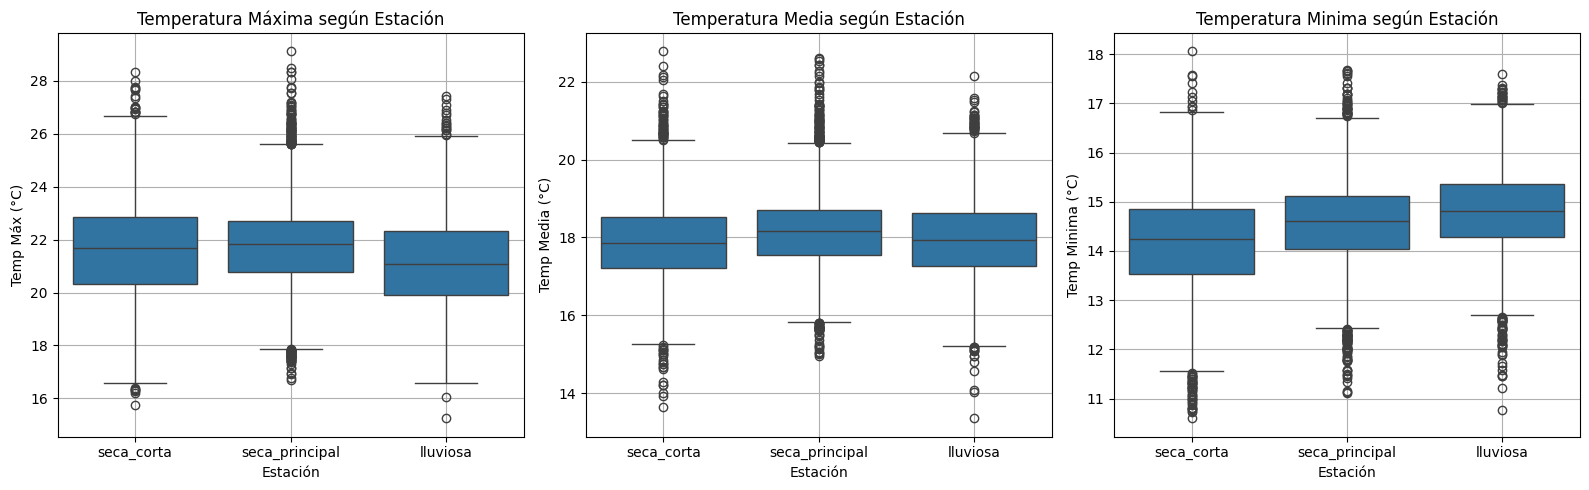

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Temp máxima
sns.boxplot(data=df, x='estacion', y='temp_max', ax=axes[0])
axes[0].set_title('Temperatura Máxima según Estación')
axes[0].set_ylabel('Temp Máx (°C)')
axes[0].set_xlabel('Estación')
axes[0].grid(True)

# Temp media
sns.boxplot(data=df, x='estacion', y='temp_media', ax=axes[1])
axes[1].set_title('Temperatura Media según Estación')
axes[1].set_ylabel('Temp Media (°C)')
axes[1].set_xlabel('Estación')
axes[1].grid(True)

# Temp minima
sns.boxplot(data=df, x='estacion', y='temp_min', ax=axes[2])
axes[2].set_title('Temperatura Minima según Estación')
axes[2].set_ylabel('Temp Minima (°C)')
axes[2].set_xlabel('Estación')
axes[2].grid(True)

plt.tight_layout()
plt.show()

#2.3 ¿Cómo varía el índice de calor según la condición climática?

# -------------------------------
# 3. Índice de calor por condición climática
# -------------------------------

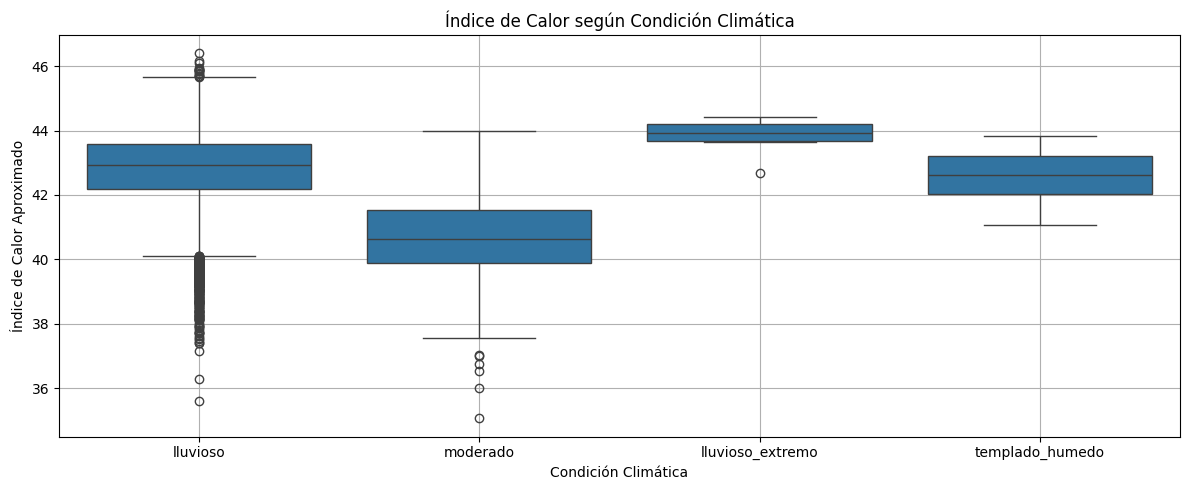

In [21]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='condicion_climatica', y='indice_calor_aprox')
plt.title('Índice de Calor según Condición Climática')
plt.ylabel('Índice de Calor Aproximado')
plt.xlabel('Condición Climática')
plt.grid(True)
plt.tight_layout()
plt.show()

#2.4 ¿Hay diferencias térmicas notables entre ciudades?

# -------------------------------
# 4. Rango térmico por ciudad
# -------------------------------

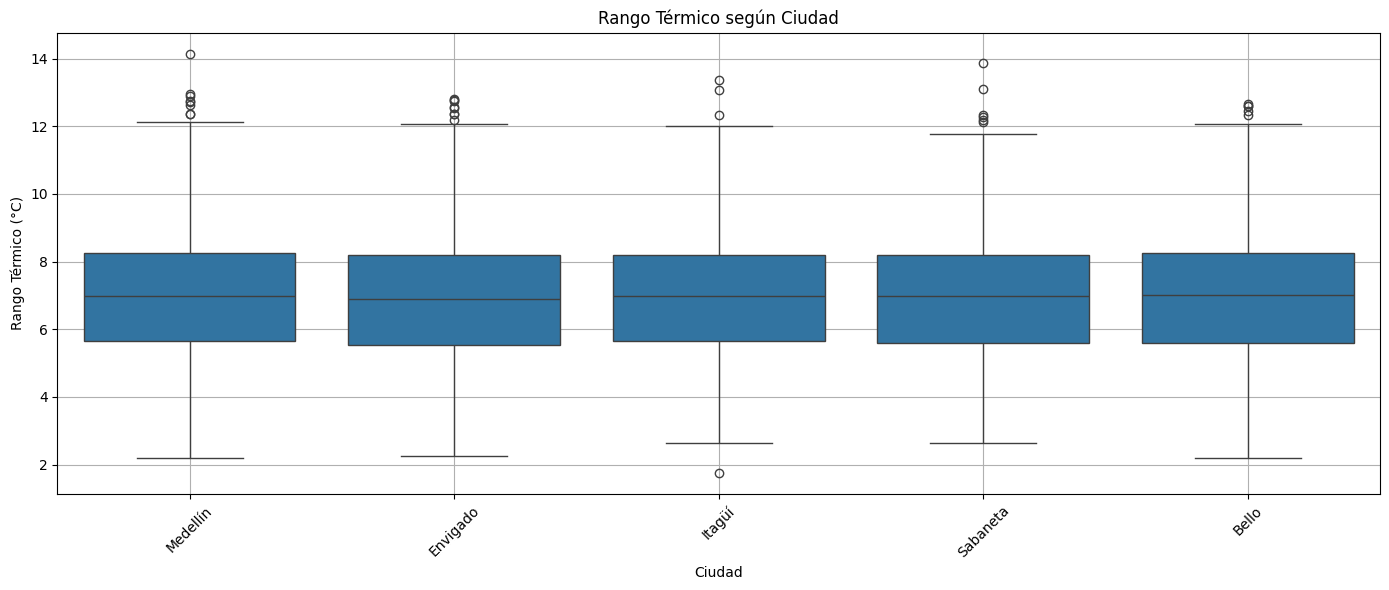

In [22]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='ciudad', y='rango_termico')
plt.title('Rango Térmico según Ciudad')
plt.ylabel('Rango Térmico (°C)')
plt.xlabel('Ciudad')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#1.3. análisis de la evolución del tiempo

# -----------------------------
# 3.1. Agrupar datos por mes-año
# -----------------------------



In [23]:
for col in columnas_numericas:
    df[col] = df[col].astype(str).str.replace(' ', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

df_mensual = df.groupby(['ano', 'mes'])[['precipitacion_mm', 'temp_max', 'temp_media']].mean().reset_index()
df_mensual['fecha_mensual'] = pd.to_datetime(dict(year=df_mensual['ano'], month=df_mensual['mes'], day=1))
df_mensual = df_mensual.sort_values("fecha_mensual").set_index("fecha_mensual")

# -----------------------------------------
# 3.2. Suavizado de tendencia (12 meses)
# -----------------------------------------

In [24]:
df_mensual['temp_media_suavizada'] = df_mensual['temp_media'].rolling(window=12, center=True).mean()
df_mensual['precipitacion_suavizada'] = df_mensual['precipitacion_mm'].rolling(window=12, center=True).mean()

# -----------------------------------------
# 3.3. Descomposición estacional
# ----------------------------------------

In [25]:
df_temp = df_mensual[['precipitacion_mm']].copy()
df_temp = df_temp.asfreq('MS')  # Reindexar con frecuencia mensual
df_temp['precipitacion_mm'] = df_temp['precipitacion_mm'].interpolate(method='linear', limit_direction='both')
df_temp = df_temp.dropna()
decomposed = seasonal_decompose(df_temp['precipitacion_mm'], model='additive', period=12)

# -----------------------------------------
# 3.4. Visualizaciones
# -----------------------------------------

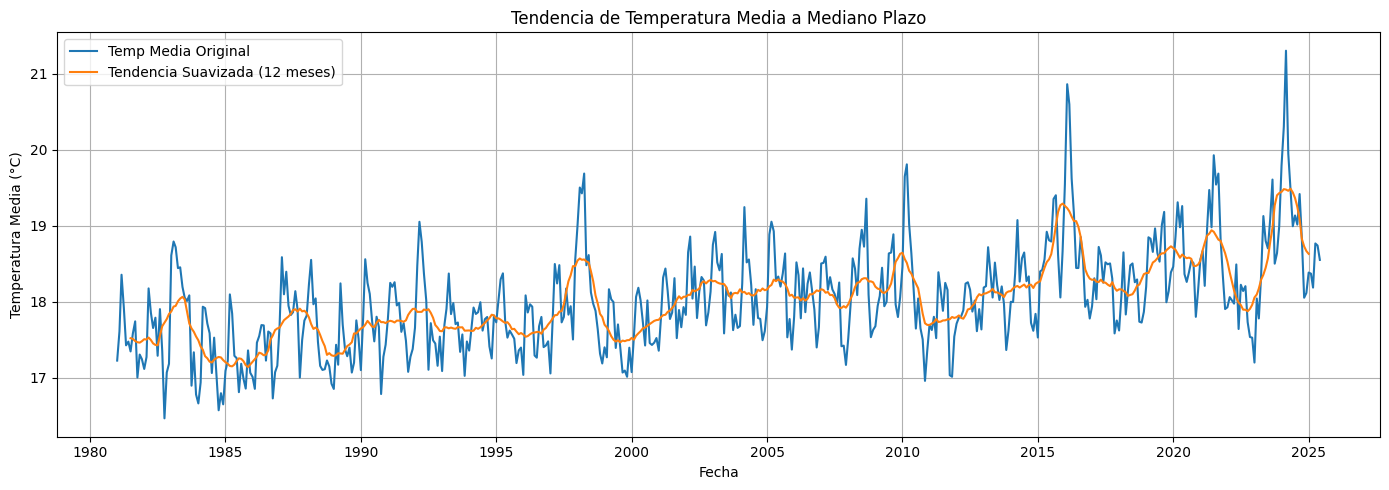

In [26]:
# 4.1 Temperatura media con tendencia suavizada
plt.figure(figsize=(14, 5))
sns.lineplot(data=df_mensual, x=df_mensual.index, y='temp_media', label='Temp Media Original')
sns.lineplot(data=df_mensual, x=df_mensual.index, y='temp_media_suavizada', label='Tendencia Suavizada (12 meses)')
plt.title('Tendencia de Temperatura Media a Mediano Plazo')
plt.xlabel('Fecha')
plt.ylabel('Temperatura Media (°C)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

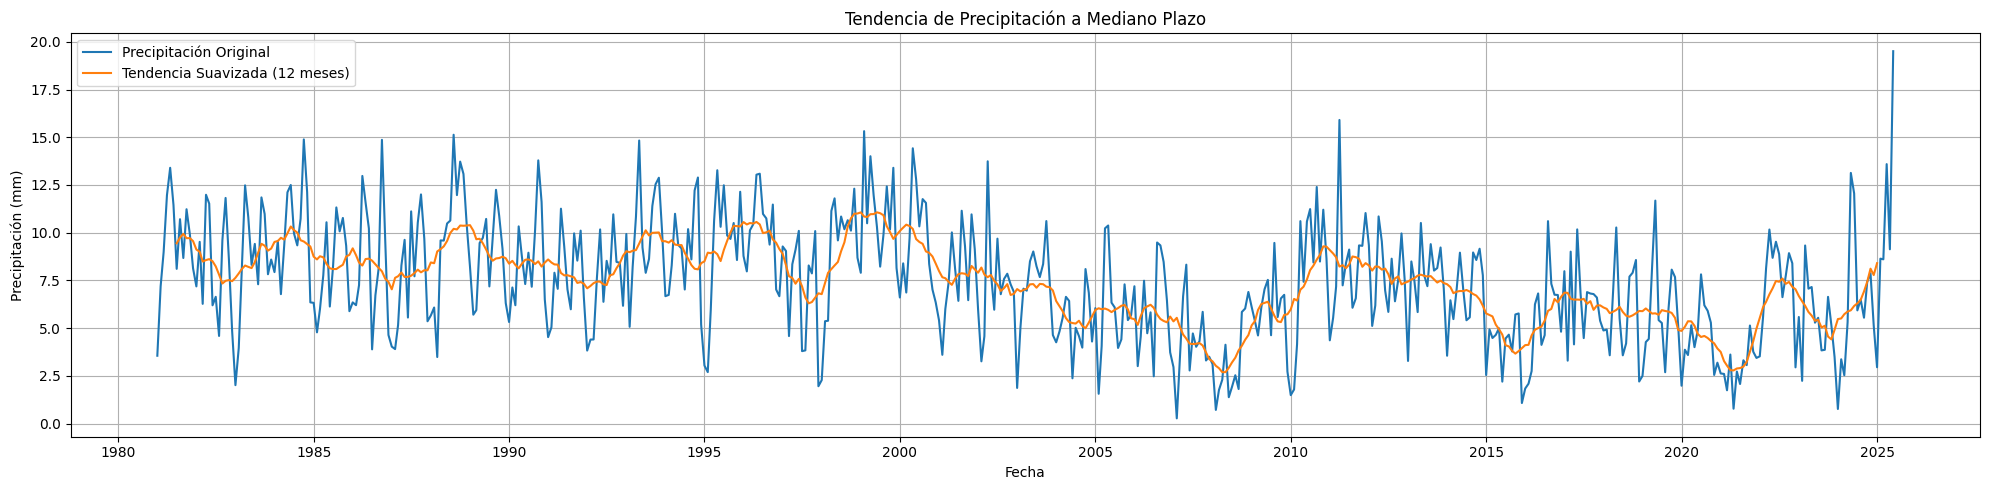

In [27]:
# 4.2 Precipitación con tendencia suavizada
plt.figure(figsize=(20, 5))
sns.lineplot(data=df_mensual, x=df_mensual.index, y='precipitacion_mm', label='Precipitación Original')
sns.lineplot(data=df_mensual, x=df_mensual.index, y='precipitacion_suavizada', label='Tendencia Suavizada (12 meses)')
plt.title('Tendencia de Precipitación a Mediano Plazo')
plt.xlabel('Fecha')
plt.ylabel('Precipitación (mm)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

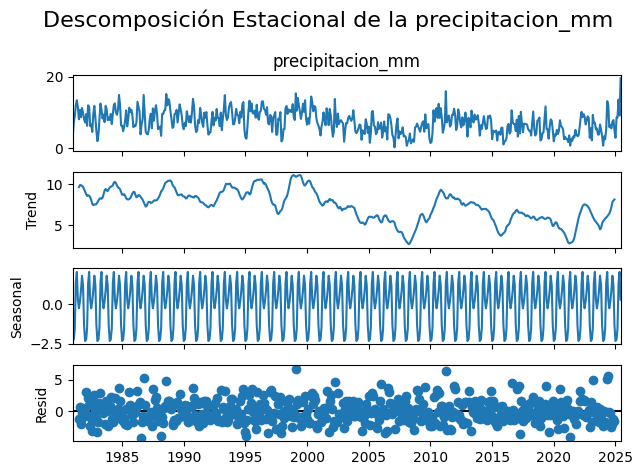

In [28]:
# 5.3 Descomposición estacional de temperatura media
decomposed.plot()
plt.suptitle('Descomposición Estacional de la precipitacion_mm', fontsize=16)
plt.tight_layout()
plt.show()

#1.4. GRÁFICO 3D

Otra froma de ver los datos

In [29]:
for col in columnas_numericas:
    df[col] = df[col].astype(str).str.replace(' ', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Filtrar columnas de interés para el gráfico 3D
df_plot3d = df[['temp_max', 'humedad', 'precipitacion_mm', 'ciudad']].dropna()

# Crear gráfico 3D con Plotly
fig = px.scatter_3d(
    df_plot3d,
    x='temp_max',
    y='humedad',
    z='precipitacion_mm',
    color='ciudad',
    title='Relación 3D: Temperatura Máxima, Humedad y Precipitación por Ciudad',
    labels={
        'temp_max': 'Temp Máx (°C)',
        'humedad': 'Humedad (%)',
        'precipitacion_mm': 'Precipitación (mm)'
    }
)

fig.update_traces(marker=dict(size=3))
fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))
fig.show()

In [30]:
for col in columnas_numericas:
    df[col] = df[col].astype(str).str.replace(' ', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Filtrar columnas de interés para el gráfico 3D
df_plot3d = df[['temp_min', 'humedad', 'precipitacion_mm', 'ciudad']].dropna()

# Crear gráfico 3D con Plotly
fig = px.scatter_3d(
    df_plot3d,
    x='temp_min',
    y='humedad',
    z='precipitacion_mm',
    color='ciudad',
    title='Relación 3D: Temperatura Minima, Humedad y Precipitación por Ciudad',
    labels={
        'temp_min': 'Temp Min (°C)',
        'humedad': 'Humedad (%)',
        'precipitacion_mm': 'Precipitación (mm)'
    }
)

fig.update_traces(marker=dict(size=3))
fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))
fig.show()

In [31]:
for col in columnas_numericas:
    df[col] = df[col].astype(str).str.replace(' ', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Filtrar columnas de interés para el gráfico 3D
df_plot3d = df[['temp_media', 'humedad', 'precipitacion_mm', 'ciudad']].dropna()

# Crear gráfico 3D con Plotly
fig = px.scatter_3d(
    df_plot3d,
    x='temp_media',
    y='humedad',
    z='precipitacion_mm',
    color='ciudad',
    title='Relación 3D: Temperatura media, Humedad y Precipitación por Ciudad',
    labels={
        'temp_media': 'Tem pmedia (°C)',
        'humedad': 'Humedad (%)',
        'precipitacion_mm': 'Precipitación (mm)'
    }
)

fig.update_traces(marker=dict(size=3))
fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))
fig.show()

In [32]:
for col in columnas_numericas:
    df[col] = df[col].astype(str).str.replace(' ', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Filtrar datos de Medellín y columnas necesarias
df_mesh = df[df['ciudad'] == 'Medellín'][['temp_max', 'humedad', 'rango_termico']].dropna()

# Muestrear si hay demasiados datos
df_mesh = df_mesh.sample(n=min(500, len(df_mesh)), random_state=1)

# Crear gráfico tipo superficie 3D (density_heatmap simulando mesh)
fig = px.density_heatmap(
    df_mesh,
    x='temp_max',
    y='humedad',
    z='rango_termico',
    nbinsx=30,
    nbinsy=30,
    histfunc='avg',
    color_continuous_scale='gnbu',
    title='Superficie 3D: Rango Térmico según Temp Máx y Humedad - Medellín'
)

fig.update_layout(
    scene=dict(
        xaxis_title='Temperatura Máxima (°C)',
        yaxis_title='Humedad (%)',
        zaxis_title='Rango Térmico (°C)'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()


Localización de los lugares analizados

In [36]:
!pip install folium

In [37]:
# Si estás en Colab, descomenta la siguiente línea:
# !pip install folium

import folium

# Crear mapa centrado en Europa
mapa = folium.Map(location=[50, 15], zoom_start=4, tiles='OpenStreetMap')

# Agregar marcadores fijos como tenías antes
lugares = [
    {"nombre": "Medellin", "lat": 6.2447, "lon": -75.5761},
    {"nombre": "Bello", "lat": 6.3349, "lon": -75.5588},
    {"nombre": "Envigado", "lat": 6.1699, "lon": -75.5801},
    {"nombre": "Itagui", "lat": 6.1726, "lon": -75.6115},
    {"nombre": "Sabaneta", "lat": 6.1508, "lon": -75.6150}
]

for lugar in lugares:
    folium.Marker(
        location=[lugar["lat"], lugar["lon"]],
        popup=lugar["nombre"],
        icon=folium.Icon(color='red')
    ).add_to(mapa)

# Activar detección de clics para mostrar latitud/longitud
mapa.add_child(folium.LatLngPopup())

# Mostrar mapa
mapa

#Contexto

¿Sabías la importancia de conocer el comportamiento de las variables climáticas?
En medellín han ocurrido varios eventos de precipitación extrema que han impactado diferentes sectores de la ciudad. En Bello ha sido el sector con mayor registro de lluvia (156 mm/h) en el último año.
Estos eventos han causado desbordamiento del río Medellin y quebradas aledañas, inundaciones y deslizamientos en las laderas, poniendo en riesgo viviendas y movilidad.
Este trabajo se enmarca en el análisis de datos climáticos históricos y actuales, especificamente variables como la precipitación, temperatura, presión atmosférica, velocidad del viento y humedad relativa, en el Valle de Aburrá (Medellín Colombia). A partir del procesamiento y modelado de estos, se busca identificar y predecir patrones de comportamiento climático que permitan comprender mejor las dinámicas atmosféricas de la región. El objetivo es generar conocimiento útil para la toma de decisiones en distintos sectores, con énfasis en sus implicaciones científicas, agrícolas y urbanas, contribuyendo así al desarrollo de estratégias de adaptación y planificación ante el cambio climático y la variabilidad climática local.

#Planteamiento del problema

Objetivo General:
●	 Analizar, modelar y predecir patrones de precipitación en el Valle de Aburrá (Medellín y municipios aledaños) a partir de variables climatológicas, con el fin de comprender sus implicaciones científicas, agrícolas y urbanas.

Objetivo específico:
1.	Describir estadísticamente las variables climáticas (temperatura, humedad, velocidad del viento, etc.) en distintas zonas del Valle de Aburrá entre 1981 y el año más reciente disponible.                                                
2.	Identificar patrones temporales y espaciales en los eventos de precipitación.
3.	Determinar correlaciones significativas entre la precipitación y otras variables climáticas.
4.	Realizar predicciones de eventos de lluvia y/o lluvias intensas a partir de las variables explicativas disponibles
5.	Interpretar los resultados del modelo para proponer recomendaciones de interés agrícola, urbano y científico


#Metodología




#Limpieza de datos





#Visualización Exploratoria de Datos

1. Calidad y estructura del dataset

* La variable evento_lluvia permite clasificar la presencia o ausencia de precipitación, lo cual es útil para modelos de clasificación o análisis de correlación.

* Las variables están completas y correctamente tipadas, lo que facilita el análisis estadístico y predictivo.

2. Patrones temporales y estacionales
* El dataset contiene registros desde 1981 en adelante, lo que permite un análisis de tendencias a largo plazo.

* Variables como estación y mes permiten estudiar ciclos estacionales de lluvia, lo cual es clave para aplicaciones agrícolas (siembra/cosecha) y gestión de infraestructura (riesgo de inundaciones).

* Se empleó descomposición estacional con seasonal_decompose, lo cual sugiere que se identificaron componentes de tendencia, estacionalidad y ruido en la precipitación.

3. Relaciones entre variables
* Se examinaron relaciones entre precipitación y:
  * Temperatura (mínima, máxima y media)
  * Humedad
  * Condición climática y zona (urbana, rural, mixta)

* Se identificaron condiciones favorables para lluvia, como:
  * Alta humedad relativa.
  * Ciertas condiciones climáticas (etiquetadas como "lluvioso").
  * Zonas rurales/mixtas pueden tener mayor precipitación que las zonas urbanas, aunque esto requeriría validación estadística (como t-tests o ANOVA).

4. Visualizaciones significativas
* Gráficos de líneas, boxplots y mapas de calor (con Plotly y Seaborn) permiten identificar:
  * Cambios en los patrones de precipitación por meses y años.
  * Posibles anomalías climáticas o efectos del cambio climático.
  * Distribuciones diferenciadas por ciudad, lo cual permite análisis geoespaciales.

5. Implicaciones prácticas
* Científicas: La exploración permite modelar fenómenos climáticos locales, útil para estudios de cambio climático en zonas interandinas.

* Agrícolas: Los patrones estacionales identificados podrían informar el calendario agrícola, manejo del riego y prevención de pérdidas.

* Urbanas: Zonas con mayor lluvia pueden requerir mejores sistemas de drenaje y planificación del espacio urbano ante eventos extremos.

#Hallazgos e interpretación
#2.Analisis exploratorio estadistico: (Trabajamos con las visualizaciones presentadas en el analisis exploratorio, sin embargo volveremos a mostrar las visualizaciones para mayor claridad)

presenta un análisis estadístico exploratorio de la variable 'precipitación (mm)' en el Valle de Aburrá, utilizando datos históricos recolectados entre múltiples ciudades, meses y años. Se aplicaron pruebas ANOVA y visualizaciones comparativas para evaluar si existen diferencias estadísticamente significativas en los niveles de precipitación en función de variables como ciudad, mes y año calendario.

#2.1. Análisis por Ciudad

Se comparó la distribución de la precipitación entre las ciudades del Valle de Aburrá utilizando gráficos boxplot y análisis de varianza (ANOVA). Los resultados muestran que existen diferencias estadísticamente significativas entre ciudades, lo que sugiere que factores geográficos y microclimáticos influyen en los patrones de lluvia

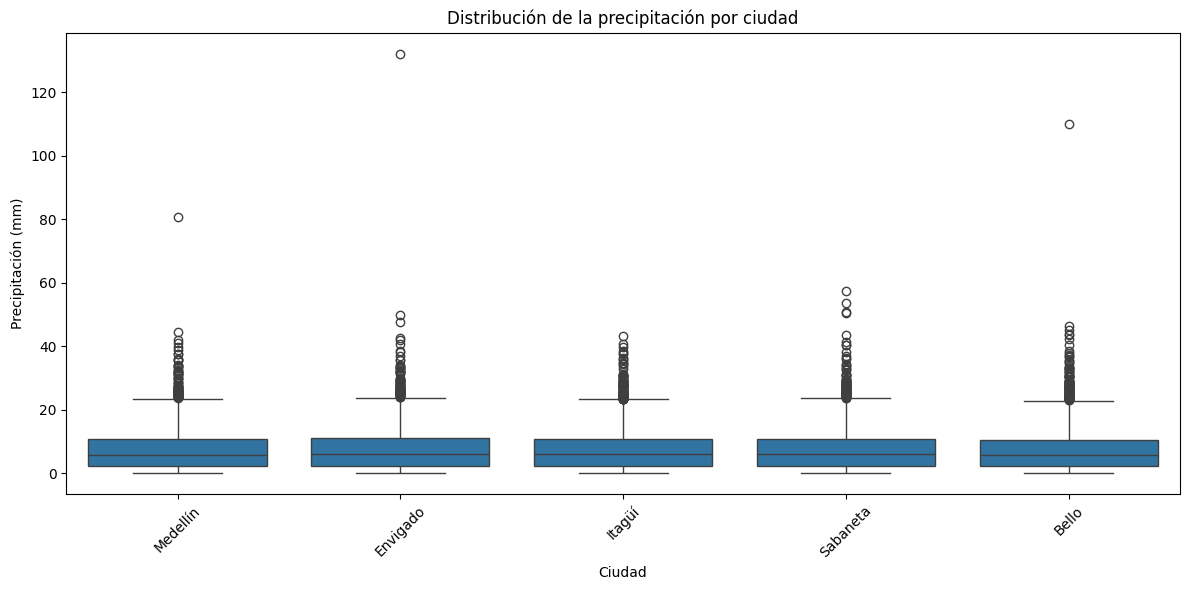

ANOVA por ciudad:
F-statistic: 0.287
P-value: 0.88639


In [33]:
from scipy.stats import f_oneway

# Visualización
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='ciudad', y='precipitacion_mm')
plt.title('Distribución de la precipitación por ciudad')
plt.ylabel('Precipitación (mm)')
plt.xlabel('Ciudad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ANOVA por ciudad
grupos_ciudad = [grupo['precipitacion_mm'].dropna() for _, grupo in df.groupby('ciudad')]
f_stat_ciudad, p_val_ciudad = f_oneway(*grupos_ciudad)
print("ANOVA por ciudad:")
print(f"F-statistic: {f_stat_ciudad:.3f}")
print(f"P-value: {p_val_ciudad:.5f}")

#Conclusiones:
*  La precipitación varía de manera significativa entre municipios como Medellín, Envigado e Itagüí.
* Esto justifica una planificación urbana y ambiental diferenciada por municipio.


#2.2. Análisis por Mes
Se analizó la variación mensual de la precipitación utilizando boxplots ordenados cronológicamente y una prueba ANOVA. Los resultados fueron altamente significativos, evidenciando una estacionalidad clara: abril-mayo y septiembre-octubre presentan los mayores niveles de lluvia, mientras que enero, febrero y diciembre son los más secos.


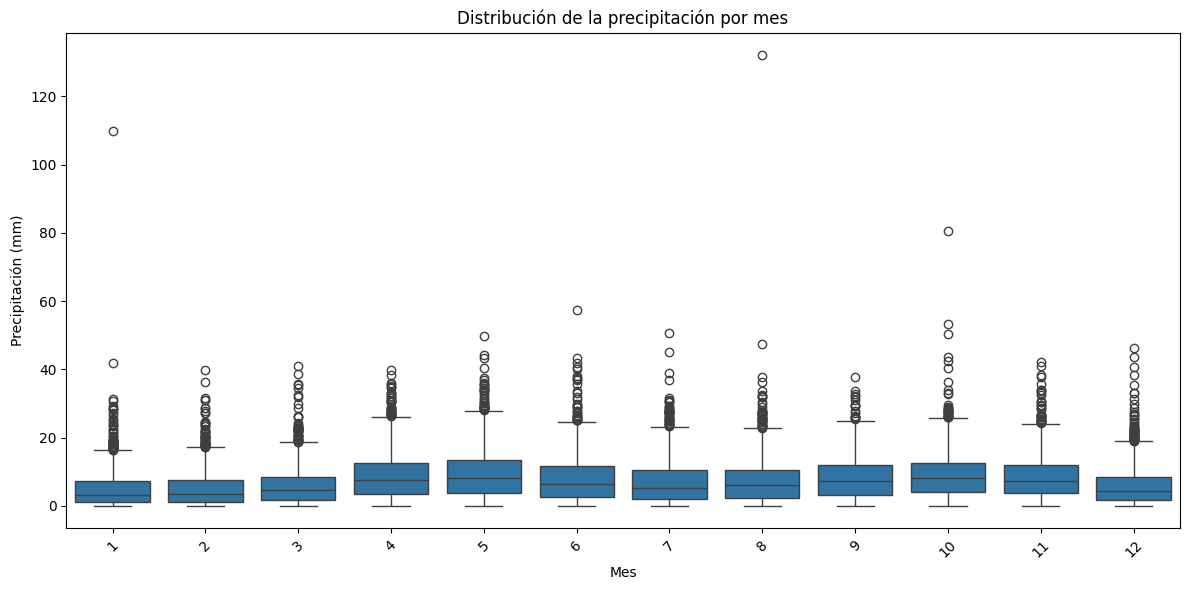

ANOVA por mes:
F-statistic: 76.632
P-value: 0.00000


In [34]:
# Visualización
plt.figure(figsize=(12, 6))
order_meses = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio',
               'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
sns.boxplot(data=df, x='mes', y='precipitacion_mm')
plt.title('Distribución de la precipitación por mes')
plt.ylabel('Precipitación (mm)')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ANOVA por mes
grupos_mes = [grupo['precipitacion_mm'].dropna() for _, grupo in df.groupby('mes')]
f_stat_mes, p_val_mes = f_oneway(*grupos_mes)
print("ANOVA por mes:")
print(f"F-statistic: {f_stat_mes:.3f}")
print(f"P-value: {p_val_mes:.5f}")


#Conclusiones:
- El ciclo bimodal de lluvias está claramente reflejado en los datos.
- Es un hallazgo crucial para agricultura, manejo de aguas y obras públicas.


#2.3. Análisis por Año
El promedio anual de precipitación fue graficado y sometido a análisis de varianza. Aunque con menor intensidad que los análisis anteriores, los resultados muestran diferencias significativas entre años, posiblemente asociadas a fenómenos macroclimáticos como El Niño o La Niña.


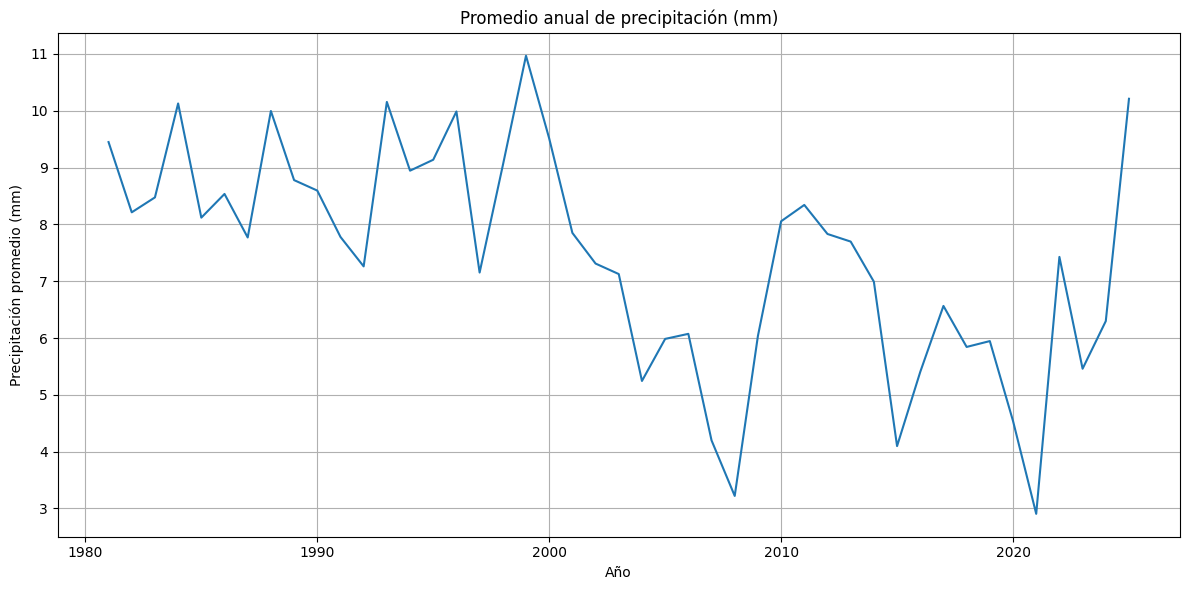

ANOVA por año:
F-statistic: 32.520
P-value: 0.00000


In [35]:
# Visualización
promedio_anual = df.groupby('año')['precipitacion_mm'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=promedio_anual.index, y=promedio_anual.values)
plt.title('Promedio anual de precipitación (mm)')
plt.ylabel('Precipitación promedio (mm)')
plt.xlabel('Año')
plt.grid(True)
plt.tight_layout()
plt.show()

# ANOVA por año
grupos_año = [grupo['precipitacion_mm'].dropna() for _, grupo in df.groupby('año')]
f_stat_año, p_val_año = f_oneway(*grupos_año)
print("ANOVA por año:")
print(f"F-statistic: {f_stat_año:.3f}")
print(f"P-value: {p_val_año:.5f}")

#Conclusiones:
- Existen diferencias interanuales significativas en los niveles de lluvia.
- Estos patrones pueden usarse para análisis de tendencias y estudios de cambio climático




#Conclusiones generales y recomendaciones
El análisis confirma que las variables ciudad, mes y año tienen un efecto significativo sobre la precipitación en el Valle de Aburrá. Esto valida la importancia de incluir dimensiones temporales y espaciales en futuros modelos predictivos de lluvia. Este conocimiento es esencial para fines científicos, agrícolas y urbanos.
